#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

#### Loading data file in dataframe

In [2]:
data = pd.read_csv('Dataset.data', sep=" ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Changing the column names

In [3]:
data.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "country", "salary" ]

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  country         48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### Convert salary and sex column to integer

In [6]:
data['salary'] = data['salary'].map({'<=50K': 0, '>50K': 1}).astype(int)
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1}).astype(int)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,1,0,0,30,United-States,0


#### Finding correlation between columns

In [7]:
def plot_correlation(data, size=15):
    corr= data.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

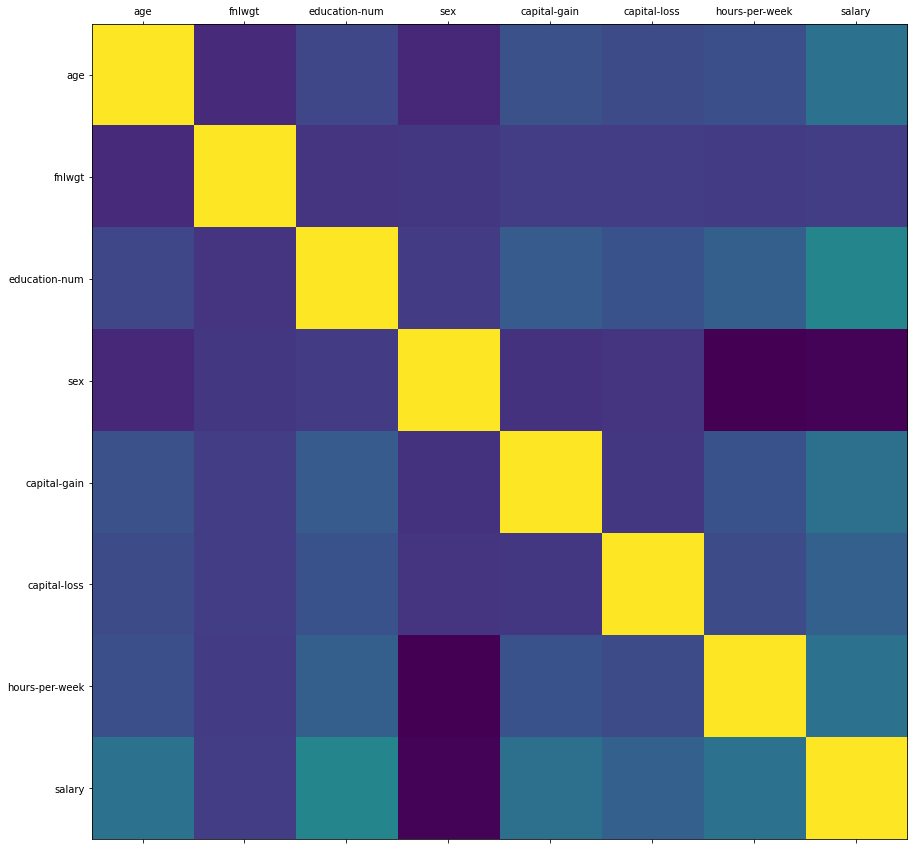

In [8]:
plot_correlation(data)

In [9]:
data[['country','salary']].groupby(['country']).mean()

,salary
country,
?,0.256709
Cambodia,0.321429
Canada,0.346154
China,0.295082
Columbia,0.047059
Cuba,0.246377
Dominican-Republic,0.048544
Ecuador,0.133333
El-Salvador,0.070968


#### Drop Empty value marked as '?'

In [10]:
data['country'] = data['country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

data.dropna(how='any',inplace=True)

#### Converting the countries into US or Non-US and then converting it into Integers

In [11]:
Dat = [data]
for dataset in Dat:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'

In [12]:
data['country'] = data['country'].map({'US':1,'Non-US':0}).astype(int)

In [13]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,0,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,0,0,30,0,0


#### Visualising the data using histograms

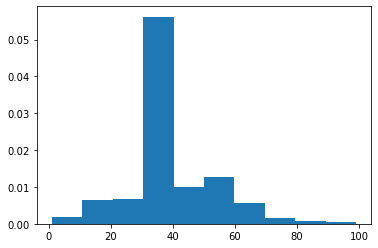

In [14]:
x= data['hours-per-week']
plt.hist(x,bins=None,density=True,histtype='bar')
plt.show()

In [15]:
data[['relationship','salary']].groupby(['relationship']).mean()

,salary
relationship,
Husband,0.455748
Not-in-family,0.104939
Other-relative,0.037064
Own-child,0.015847
Unmarried,0.063074
Wife,0.485892


In [16]:
data[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.104018
Married-AF-spouse,0.437500
Married-civ-spouse,0.454239
Married-spouse-absent,0.097826
Never-married,0.048020
Separated,0.070163
Widowed,0.094753


#### Converting the marital status into Single and Couple and then converting it into Integers

In [17]:
data['marital-status'] = data['marital-status'].replace(['Divorced','Married-spouse-absent','Never-married','Separated','Widowed'],'Single')
data['marital-status'] = data['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse'],'Couple')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,Single,Machine-op-inspct,Own-child,Black,0,0,0,40,0,0
1,38,Private,89814,HS-grad,9,Couple,Farming-fishing,Husband,White,0,0,0,50,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Couple,Protective-serv,Husband,White,0,0,0,40,0,1
3,44,Private,160323,Some-college,10,Couple,Machine-op-inspct,Husband,Black,0,7688,0,40,0,1
5,34,Private,198693,10th,6,Single,Other-service,Not-in-family,White,0,0,0,30,0,0


In [18]:
data[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.454213
Single,0.067537


In [19]:
data[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship            
Couple         Husband         0.455748
               Not-in-family   0.263158
               Other-relative  0.151351
               Own-child       0.174603
               Wife            0.485892
Single         Not-in-family   0.104682
               Other-relative  0.018900
               Own-child       0.012769
               Unmarried       0.063074

In [20]:
data[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship   marital-status          
Husband        Couple          0.455748
Not-in-family  Couple          0.263158
               Single          0.104682
Other-relative Couple          0.151351
               Single          0.018900
Own-child      Couple          0.174603
               Single          0.012769
Unmarried      Single          0.063074
Wife           Couple          0.485892

In [21]:
data['marital-status'] = data['marital-status'].map({'Couple':0,'Single':1})
   
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,1,Machine-op-inspct,Own-child,Black,0,0,0,40,0,0
1,38,Private,89814,HS-grad,9,0,Farming-fishing,Husband,White,0,0,0,50,0,0
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,Husband,White,0,0,0,40,0,1
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,Husband,Black,0,7688,0,40,0,1
5,34,Private,198693,10th,6,1,Other-service,Not-in-family,White,0,0,0,30,0,0
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,Husband,White,0,3103,0,32,0,1
8,24,Private,369667,Some-college,10,1,Other-service,Unmarried,White,1,0,0,40,0,0
9,55,Private,104996,7th-8th,4,0,Craft-repair,Husband,White,0,0,0,10,0,0
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,Husband,White,0,6418,0,40,0,1
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,Husband,White,0,0,0,40,0,0


#### Converting the relationship into integers

In [22]:
rel_map = {'Unmarried':0,'Wife':1,'Husband':2,'Not-in-family':3,'Own-child':4,'Other-relative':5}

data['relationship'] = data['relationship'].map(rel_map)
    
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,Black,0,0,0,40,0,0
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,White,0,0,0,50,0,0
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,White,0,0,0,40,0,1
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,Black,0,7688,0,40,0,1
5,34,Private,198693,10th,6,1,Other-service,3,White,0,0,0,30,0,0
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,White,0,3103,0,32,0,1
8,24,Private,369667,Some-college,10,1,Other-service,0,White,1,0,0,40,0,0
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,White,0,0,0,10,0,0
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,White,0,6418,0,40,0,1
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,White,0,0,0,40,0,0


In [23]:
data[['race','salary']].groupby('race').mean()

,salary
race,
Amer-Indian-Eskimo,0.121839
Asian-Pac-Islander,0.283193
Black,0.126301
Other,0.127479
White,0.262371


#### Analysing and Converting the race into integers

In [24]:
race_map={'White':0,'Amer-Indian-Eskimo':1,'Asian-Pac-Islander':2,'Black':3,'Other':4}


data['race']= data['race'].map(race_map)
    
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,0,0,0,40,0,0
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,0,0,0,50,0,0
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,0,0,0,40,0,1
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,0,7688,0,40,0,1
5,34,Private,198693,10th,6,1,Other-service,3,0,0,0,0,30,0,0
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,0,3103,0,32,0,1
8,24,Private,369667,Some-college,10,1,Other-service,0,0,1,0,0,40,0,0
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,0,0,0,10,0,0
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,0,6418,0,40,0,1
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,0,0,0,40,0,0


In [25]:
data[['occupation','salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.136462
Armed-Forces,0.285714
Craft-repair,0.225083
Exec-managerial,0.479111
Farming-fishing,0.116216
Handlers-cleaners,0.065982
Machine-op-inspct,0.122896
Other-service,0.040765
Priv-house-serv,0.012931


In [26]:
data[['workclass','salary']].groupby(['workclass']).mean()

,salary
workclass,
Federal-gov,0.390469
Local-gov,0.295161
Private,0.217702
Self-emp-inc,0.554070
Self-emp-not-inc,0.278978
State-gov,0.267215
Without-pay,0.095238


In [27]:
def f(x):
    if x['workclass'] == 'Federal-gov' or x['workclass']== 'Local-gov' or x['workclass']=='State-gov': return 'govt'
    elif x['workclass'] == 'Private':return 'private'
    elif x['workclass'] == 'Self-emp-inc' or x['workclass'] == 'Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'    
    
data['employment_type']=data.apply(f, axis=1)

data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,0,0,0,40,0,0,private
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,0,0,0,50,0,0,private
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,0,0,0,40,0,1,govt
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,0,7688,0,40,0,1,private
5,34,Private,198693,10th,6,1,Other-service,3,0,0,0,0,30,0,0,private
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,0,3103,0,32,0,1,self_employed
8,24,Private,369667,Some-college,10,1,Other-service,0,0,1,0,0,40,0,0,private
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,0,0,0,10,0,0,private
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,0,6418,0,40,0,1,private
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,0,0,0,40,0,0,govt


In [28]:
data[['employment_type','salary']].groupby(['employment_type']).mean()

,salary
employment_type,
govt,0.307502
private,0.217702
self_employed,0.362183
without_pay,0.095238


In [29]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

data['employment_type'] = data['employment_type'].map(employment_map)
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,25,Private,226802,11th,7,1,Machine-op-inspct,4,3,0,0,0,40,0,0,1
1,38,Private,89814,HS-grad,9,0,Farming-fishing,2,0,0,0,0,50,0,0,1
2,28,Local-gov,336951,Assoc-acdm,12,0,Protective-serv,2,0,0,0,0,40,0,1,0
3,44,Private,160323,Some-college,10,0,Machine-op-inspct,2,3,0,7688,0,40,0,1,1
5,34,Private,198693,10th,6,1,Other-service,3,0,0,0,0,30,0,0,1
7,63,Self-emp-not-inc,104626,Prof-school,15,0,Prof-specialty,2,0,0,3103,0,32,0,1,2
8,24,Private,369667,Some-college,10,1,Other-service,0,0,1,0,0,40,0,0,1
9,55,Private,104996,7th-8th,4,0,Craft-repair,2,0,0,0,0,10,0,0,1
10,65,Private,184454,HS-grad,9,0,Machine-op-inspct,2,0,0,6418,0,40,0,1,1
11,36,Federal-gov,212465,Bachelors,13,0,Adm-clerical,2,0,0,0,0,40,0,0,0


In [30]:
data[['education','salary']].groupby(['education']).mean()

,salary
education,
10th,0.067048
11th,0.054972
12th,0.074523
1st-4th,0.036036
5th-6th,0.048998
7th-8th,0.066829
9th,0.056213
Assoc-acdm,0.264101
Assoc-voc,0.257274


In [31]:
data.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
data.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,25,226802,7,1,4,3,0,0,0,40,0,0,1
1,38,89814,9,0,2,0,0,0,0,50,0,0,1
2,28,336951,12,0,2,0,0,0,0,40,0,1,0
3,44,160323,10,0,2,3,0,7688,0,40,0,1,1
5,34,198693,6,1,3,0,0,0,0,30,0,0,1
7,63,104626,15,0,2,0,0,3103,0,32,0,1,2
8,24,369667,10,1,0,0,1,0,0,40,0,0,1
9,55,104996,4,0,2,0,0,0,0,10,0,0,1
10,65,184454,9,0,2,0,0,6418,0,40,0,1,1
11,36,212465,13,0,2,0,0,0,0,40,0,0,0


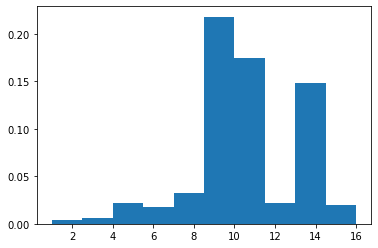

In [32]:
x= data['education-num']
plt.hist(x,bins=None,density=True,histtype='bar')
plt.show()

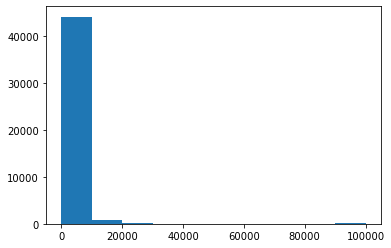

In [33]:
x=data['capital-gain']
plt.hist(x,bins=None)
plt.show()

In [34]:
data.loc[(data['capital-gain'] > 0),'capital-gain'] = 1
data.loc[(data['capital-gain'] == 0 ,'capital-gain')]= 0

In [35]:
data.head(15)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,25,226802,7,1,4,3,0,0,0,40,0,0,1
1,38,89814,9,0,2,0,0,0,0,50,0,0,1
2,28,336951,12,0,2,0,0,0,0,40,0,1,0
3,44,160323,10,0,2,3,0,1,0,40,0,1,1
5,34,198693,6,1,3,0,0,0,0,30,0,0,1
7,63,104626,15,0,2,0,0,1,0,32,0,1,2
8,24,369667,10,1,0,0,1,0,0,40,0,0,1
9,55,104996,4,0,2,0,0,0,0,10,0,0,1
10,65,184454,9,0,2,0,0,1,0,40,0,1,1
11,36,212465,13,0,2,0,0,0,0,40,0,0,0


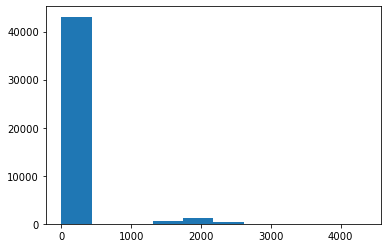

In [36]:
x=data['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [37]:
data.loc[(data['capital-loss'] > 0),'capital-loss'] = 1
data.loc[(data['capital-loss'] == 0 ,'capital-loss')]= 0

data.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,25,226802,7,1,4,3,0,0,0,40,0,0,1
1,38,89814,9,0,2,0,0,0,0,50,0,0,1
2,28,336951,12,0,2,0,0,0,0,40,0,1,0
3,44,160323,10,0,2,3,0,1,0,40,0,1,1
5,34,198693,6,1,3,0,0,0,0,30,0,0,1
7,63,104626,15,0,2,0,0,1,0,32,0,1,2
8,24,369667,10,1,0,0,1,0,0,40,0,0,1
9,55,104996,4,0,2,0,0,0,0,10,0,0,1
10,65,184454,9,0,2,0,0,1,0,40,0,1,1
11,36,212465,13,0,2,0,0,0,0,40,0,0,0


In [38]:
data['age'].count()


45222

### Machine learning model for Training
#### Divide training, validation and testing data
#### 50% training, 20% validation, 30% testing data

In [39]:
from sklearn.model_selection import train_test_split

X= data.drop(['salary'],axis=1)
y=data['salary']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [40]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (25324, 12)(25324,)
Validation dataset: (6331, 12)(6331,)
Test dataset: (13567, 12)(13567,)


#### ML algorithms for classification

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [42]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models

[LogisticRegression(),
 RandomForestClassifier(),
 MLPClassifier(),
 GaussianNB(),
 DecisionTreeClassifier(),
 SVC()]

In [43]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [44]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))

L:\Anis Development environment\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


----------------------------------------
LR: 0.7496446059074395
----------------------------------------
Random Forest: 0.8287790238508924
----------------------------------------
Neural Network: 0.7496446059074395
----------------------------------------
GaussianNB: 0.7771284157321118
----------------------------------------
DecisionTreeClassifier: 0.7760227452219238
----------------------------------------
SVM: 0.7496446059074395


### Prediction of Test data with Random Forest Classification

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [47]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8202255472838506
----------------------------------------
Confusion Matrix:
[[9248  985]
 [1454 1880]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     10233
           1       0.66      0.56      0.61      3334

    accuracy                           0.82     13567
   macro avg       0.76      0.73      0.75     13567
weighted avg       0.81      0.82      0.82     13567



### Conclusion:  Random Forest Classifier works best to explore the data and try to predict if an adult earn more than 50k per year with a accuracy of more than 80%